# Net Radiation

In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def mapping_comparison_single(site_obs, site_cal, fig_title='', axis_min=-200, axis_max=900):
    plt.figure(figsize=(8,8))
    
    nan_indices = numpy.isnan(site_obs) | numpy.isnan(site_cal)

    # 删除包含 NaN 值的位置
    x = site_obs[~nan_indices]
    y = site_cal[~nan_indices]
    
    # 绘制1:1参考线
    x_11 = numpy.arange(axis_min, axis_max + 1)
    y_11 = 1 * x_11
    plt.plot(x_11, y_11, color='k', linewidth=1, linestyle='--',)

    # 使用线性回归模型拟合数据
    model = LinearRegression()
    x = x.reshape(-1, 1)
    model.fit(x, y)
    y_pred = model.predict(x)
    xx = numpy.arange(axis_min, axis_max + 0.1, 0.05)
    yy_pred = model.coef_[0] * xx + model.intercept_
    
    # 绘制密度散点图
    xy = numpy.vstack([x.flatten(), y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x_, y_, z = x[idx], y[idx], z[idx]
    z = (z-numpy.min(z))/(numpy.max(z)-numpy.min(z))*100
    plt.scatter(x_, y_, marker='o', c=z, s=8, cmap='turbo')
    
    # 绘制散点图和回归线
#     plt.scatter(x, y, color='b')
    plt.plot(xx, yy_pred, color='red')
    

    # 添加标签
    plt.title(fig_title)
    plt.xlabel('Net radiation observed at site (W/m²)')
    plt.ylabel('Net radiation calculated for ET (W/m²)')
    
    # 计算散点个数
    num = numpy.count_nonzero(~numpy.isnan(x))

    # 计算回归方程
    equation = f'y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}'

    # 计算评估指标
    r2 = r2_score(y, y_pred)
    rmse = numpy.sqrt(mean_squared_error(y, y_pred))
    bias = numpy.mean(y_pred - y)
    mae = mean_absolute_error(y, y_pred)

    print('N:', num)
    print('R²:', r2)
    print('RMSE:', rmse)
    print('Bias:', bias)
    print('MAE', mae)

    plt.annotate(f'N: {num:d}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)
    plt.annotate(equation, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'R²: {r2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'Bias: {bias:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.70), xycoords='axes fraction', fontsize=10)

    # 显示图形
    plt.xlim((axis_min, axis_max))
    plt.ylim((axis_min, axis_max))
#     plt.colorbar(label='density')
    plt.show()


## CRK

N: 19661
R²: 0.956006727586813
RMSE: 51.710713714300844
Bias: -4.718399856611499e-15
MAE 30.41051464712808


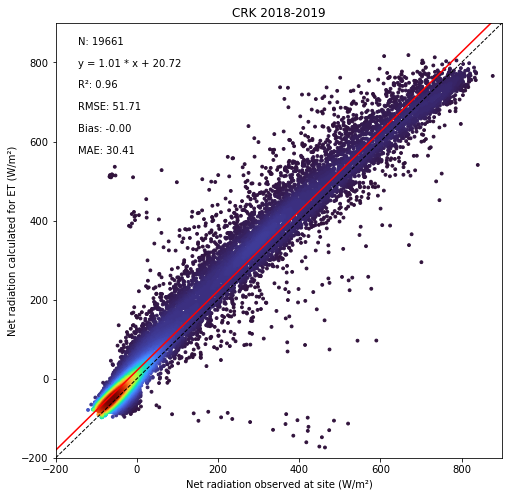

In [3]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/CRK_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/CRK_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison_single(site_obs, site_cal, 'CRK 2018-2019')

## GCK

N: 19448
R²: 0.9492007335172173
RMSE: 55.83507629846486
Bias: -1.0662525298448562e-14
MAE 30.152465332657655


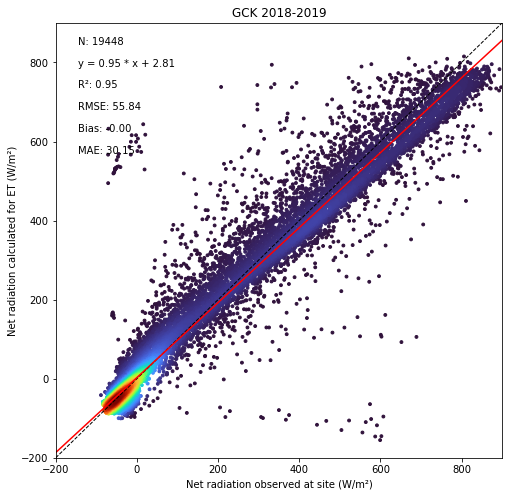

In [4]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/GCK_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/GCK_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison_single(site_obs, site_cal, 'GCK 2018-2019')

## GDK

N: 19309
R²: 0.9474502714212033
RMSE: 57.136465601938745
Bias: 2.10075424408683e-14
MAE 32.61201834027784


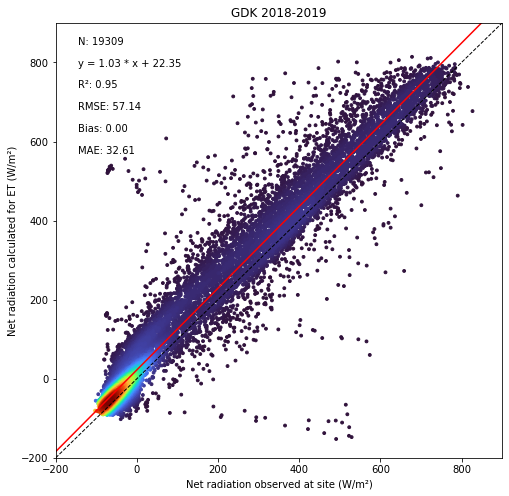

In [5]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/GDK_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/GDK_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison_single(site_obs, site_cal, 'GDK 2018-2019')

## TKY

N: 7388
R²: 0.9108414924649447
RMSE: 74.66279271517007
Bias: 7.878676355369168e-15
MAE 45.93247265560461


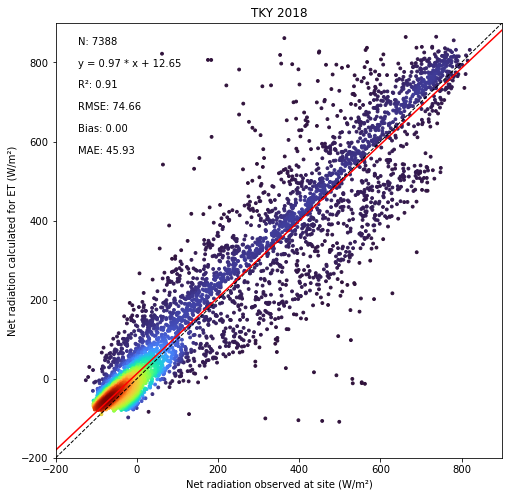

In [6]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/TKY_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/TKY_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison_single(site_obs, site_cal, 'TKY 2018')

# Part Radiation

In [7]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def half_hour_to_10min_by_nan(arr_half_hour):
    new_len = 3 * len(arr_half_hour)
    arr_10min = numpy.full(new_len, numpy.nan)
    arr_10min[::3] = arr_half_hour
    return arr_10min


def mapping_comparison(site_obs, site_cal, fig_title='', axis_min=-200, axis_max=900):
    
    data_labels = ['Rsd', 'Rsu', 'Rld', 'Rlu']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    
    axis_min_max = [[0, 1200], [0, 600], [0, 600], [0, 600]]
    
    nan_indices = numpy.isnan(site_obs[0])\
    |numpy.isnan(site_obs[1])\
    |numpy.isnan(site_obs[2])\
    |numpy.isnan(site_obs[3])\
    |numpy.isnan(site_cal[0])\
    |numpy.isnan(site_cal[1])\
    |numpy.isnan(site_cal[2])\
    |numpy.isnan(site_cal[3])
    
    count_idx = 0
    for c_idx in range(2):
        for v_idx in range(2):
            site_obs_item = site_obs[count_idx]
            site_cal_item = site_cal[count_idx]
            axis_min = axis_min_max[count_idx][0]
            axis_max = axis_min_max[count_idx][1]
            # 删除包含 NaN 值的位置
            x = site_obs_item[~nan_indices]
            y = site_cal_item[~nan_indices]

            # 绘制1:1参考线
            x_11 = numpy.arange(axis_min, axis_max + 1)
            y_11 = 1 * x_11
            axes[c_idx, v_idx].plot(x_11, y_11, color='k', linewidth=1, linestyle='--',)

            # 使用线性回归模型拟合数据
            model = LinearRegression()
            x = x.reshape(-1, 1)
            model.fit(x, y)
            y_pred = model.predict(x)
            xx = numpy.arange(axis_min, axis_max + 0.1, 0.05)
            yy_pred = model.coef_[0] * xx + model.intercept_

            # 绘制密度散点图
            xy = numpy.vstack([x.flatten(), y])
            z = gaussian_kde(xy)(xy)
            idx = z.argsort()
            x_, y_, z = x[idx], y[idx], z[idx]
            z = (z-numpy.min(z))/(numpy.max(z)-numpy.min(z))*100
            axes[c_idx, v_idx].scatter(x_, y_, marker='o', c=z, s=8, cmap='turbo')

            # 绘制散点图和回归线
            axes[c_idx, v_idx].plot(xx, yy_pred, color='red')


            # 添加标签
            axes[c_idx, v_idx].set_xlabel(data_labels[count_idx] + ' radiation observed at site (W/m²)')
            axes[c_idx, v_idx].set_ylabel(data_labels[count_idx] + ' radiation calculated for ET (W/m²)')

            # 计算散点个数
            num = numpy.count_nonzero(~numpy.isnan(x))

            # 计算回归方程
            equation = f'y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}'

            # 计算评估指标
            r2 = r2_score(y, y_pred)
            rmse = numpy.sqrt(mean_squared_error(y, y_pred))
            bias = numpy.mean(y_pred - y)
            mae = mean_absolute_error(y, y_pred)

            print('N:', num)
            print('R²:', r2)
            print('RMSE:', rmse)
            print('Bias:', bias)
            print('MAE', mae)

            axes[c_idx, v_idx].annotate(f'N: {num:d}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)
            axes[c_idx, v_idx].annotate(equation, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10)
            axes[c_idx, v_idx].annotate(f'R²: {r2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)
            axes[c_idx, v_idx].annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=10)
            axes[c_idx, v_idx].annotate(f'Bias: {bias:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=10)
            axes[c_idx, v_idx].annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.70), xycoords='axes fraction', fontsize=10)

            # 显示图形
            axes[c_idx, v_idx].set_xlim((axis_min, axis_max))
            axes[c_idx, v_idx].set_ylim((axis_min, axis_max))
            
            count_idx = count_idx + 1
        
    plt.suptitle(fig_title)
    plt.show()


N: 19661
R²: 0.9628521383102976
RMSE: 59.232796924545475
Bias: 1.8503528849456857e-14
MAE 32.26711318326605
N: 19661
R²: 0.8430378325531993
RMSE: 18.769094412867215
Bias: -1.2027293752146957e-14
MAE 10.251525858973016
N: 19661
R²: 0.8964937954555628
RMSE: 21.30470664884751
Bias: -5.4400374817403164e-14
MAE 15.780646132436207
N: 19661
R²: 0.9361599638772669
RMSE: 17.12167975387282
Bias: 5.347519837493032e-14
MAE 11.76324044463242


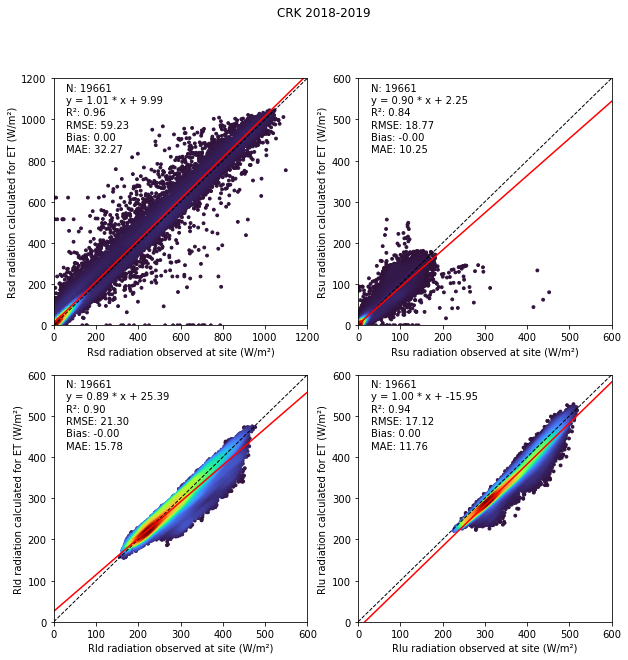

In [9]:
site_name = 'CRK'
data_labels = ['AMATERASS_Rsd', 'Rsu', 'Rld', 'Rlu']

SITE_CSV = '/disk2/Data/FluxSite4ET/validation/'+site_name+'_2018_2019_L2.csv'
csv_data = numpy.genfromtxt(SITE_CSV, delimiter=',', dtype=str)
site_obs = [half_hour_to_10min_by_nan(csv_data[:,1][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,2][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,3][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,4][1:].astype(float))]
site_cal = []
for data_label in  data_labels:
    SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/'+site_name+'_'+data_label+'.csv'
    cal_timelist, site_cal_item = read_site_csv(SITE_CAL_CSV)
    site_cal.append(site_cal_item)

mapping_comparison(site_obs, site_cal, site_name + ' 2018-2019')

N: 19448
R²: 0.9569133383037365
RMSE: 62.012160710190805
Bias: 2.6375720475109603e-14
MAE 31.722894424424236
N: 19448
R²: 0.9061800396900868
RMSE: 12.9547957297816
Bias: 8.745141363201234e-15
MAE 6.769371813360503
N: 19448
R²: 0.9264213712265105
RMSE: 16.77592972171864
Bias: -2.366332368866216e-14
MAE 12.522638906268437
N: 19448
R²: 0.9359262509615813
RMSE: 15.437975345355913
Bias: -9.259561443389541e-15
MAE 10.84975422248075


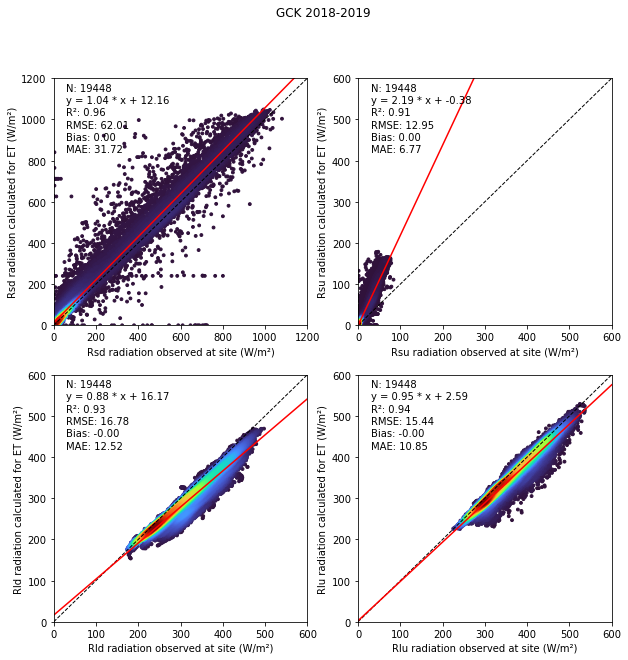

In [10]:
site_name = 'GCK'
data_labels = ['AMATERASS_Rsd', 'Rsu', 'Rld', 'Rlu']

SITE_CSV = '/disk2/Data/FluxSite4ET/validation/'+site_name+'_2018_2019_L2.csv'
csv_data = numpy.genfromtxt(SITE_CSV, delimiter=',', dtype=str)
site_obs = [half_hour_to_10min_by_nan(csv_data[:,1][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,2][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,3][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,4][1:].astype(float))]
site_cal = []
for data_label in  data_labels:
    SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/'+site_name+'_'+data_label+'.csv'
    cal_timelist, site_cal_item = read_site_csv(SITE_CAL_CSV)
    site_cal.append(site_cal_item)

mapping_comparison(site_obs, site_cal, site_name + ' 2018-2019')

N: 19309
R²: 0.9548283375346631
RMSE: 63.71823481746526
Bias: -7.536338095378762e-16
MAE 34.47570411254446
N: 19309
R²: 0.9252907115568593
RMSE: 11.674641056909815
Bias: 1.4130633928835179e-15
MAE 6.814168000620334
N: 19309
R²: 0.9094598481660807
RMSE: 18.551187541743335
Bias: -2.025390863133042e-15
MAE 13.783015553953131
N: 19309
R²: 0.9360719874330902
RMSE: 15.236317075893572
Bias: 2.390432239627951e-14
MAE 10.150307988619822


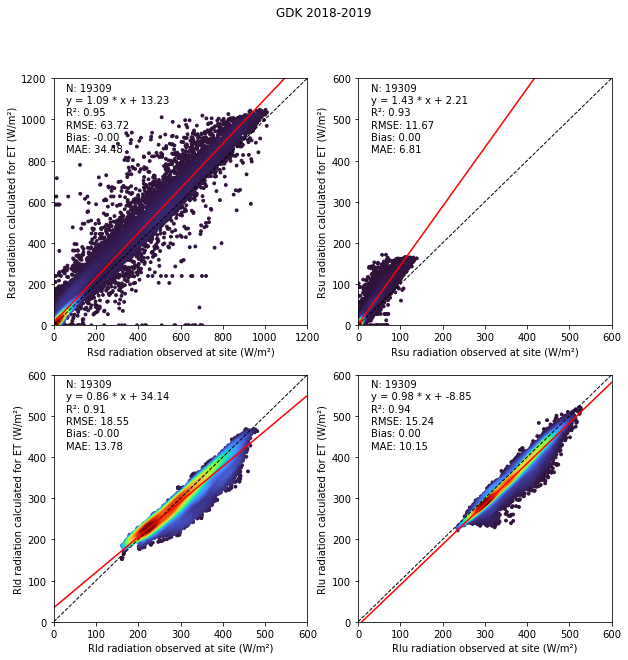

In [11]:
site_name = 'GDK'
data_labels = ['AMATERASS_Rsd', 'Rsu', 'Rld', 'Rlu']

SITE_CSV = '/disk2/Data/FluxSite4ET/validation/'+site_name+'_2018_2019_L2.csv'
csv_data = numpy.genfromtxt(SITE_CSV, delimiter=',', dtype=str)
site_obs = [half_hour_to_10min_by_nan(csv_data[:,1][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,2][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,3][1:].astype(float)), 
            half_hour_to_10min_by_nan(csv_data[:,4][1:].astype(float))]
site_cal = []
for data_label in  data_labels:
    SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/'+site_name+'_'+data_label+'.csv'
    cal_timelist, site_cal_item = read_site_csv(SITE_CAL_CSV)
    site_cal.append(site_cal_item)

mapping_comparison(site_obs, site_cal, site_name + ' 2018-2019')

N: 7388
R²: 0.9481500809002842
RMSE: 70.74622482237199
Bias: 1.8958064980107058e-14
MAE 35.51868836878082
N: 7388
R²: 0.7600955037249942
RMSE: 30.676509678385443
Bias: -2.954503633263438e-15
MAE 15.178374037753002
N: 7388
R²: 0.7123594766356229
RMSE: 27.77733049033754
Bias: 2.462086361052865e-16
MAE 22.737791618122507
N: 7388
R²: 0.9052129131338352
RMSE: 17.24905410066513
Bias: 2.8252440993081622e-14
MAE 12.534261611860945


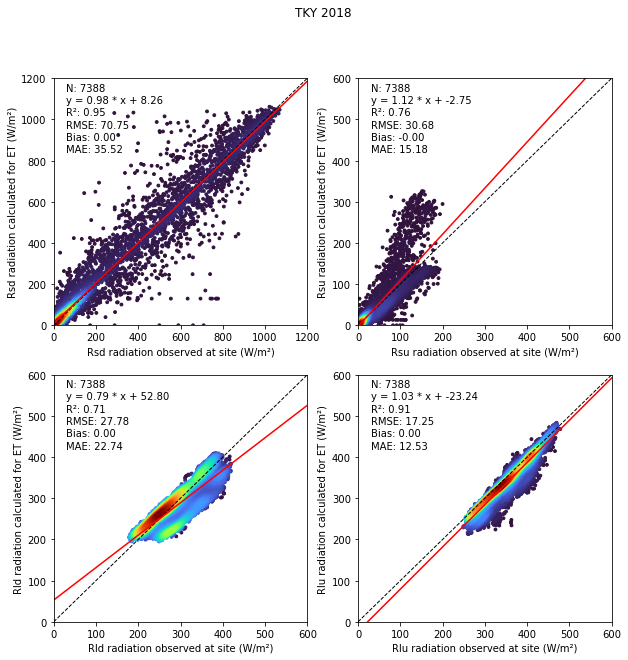

In [12]:
def half_hour_to_10min_by_nan_2y(arr_half_hour):
    new_len = 3 * len(arr_half_hour)
    arr_10min = numpy.full(new_len, numpy.nan)
    arr_10min[::3] = arr_half_hour
    nan_10min = numpy.full(len(arr_10min), numpy.nan)
    arr_10min_2y = numpy.concatenate((arr_10min, nan_10min))
    return arr_10min_2y


site_name = 'TKY'
data_labels = ['AMATERASS_Rsd', 'Rsu', 'Rld', 'Rlu']

SITE_CSV = '/disk2/Data/FluxSite4ET/validation/'+site_name+'_2018.csv'
csv_data = numpy.genfromtxt(SITE_CSV, delimiter=',', dtype=str)
site_obs = [half_hour_to_10min_by_nan_2y(csv_data[:,3][1:].astype(float)), 
            half_hour_to_10min_by_nan_2y(csv_data[:,4][1:].astype(float)), 
            half_hour_to_10min_by_nan_2y(csv_data[:,5][1:].astype(float)), 
            half_hour_to_10min_by_nan_2y(csv_data[:,6][1:].astype(float))]
site_cal = []
for data_label in  data_labels:
    SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/'+site_name+'_'+data_label+'.csv'
    cal_timelist, site_cal_item = read_site_csv(SITE_CAL_CSV)
    site_cal.append(site_cal_item)

mapping_comparison(site_obs, site_cal, site_name + ' 2018')